# Exploratory Data Analysis of the preprocessed Data


In [ ]:
# Setup
import pandas as pd
import random
import torch
import numpy as np
from datasets import Dataset
import matplotlib.pyplot as plt
import warnings
import os
from glob import glob
from collections import Counter
import seaborn as sns
import string
from wordcloud import WordCloud

# Set random seeds for reproducibility
seed = 13
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# load data 
data = pd.read_csv("../data/xxxxxxxxxxx.csv")

In [ ]:
# also, adding column with tokenized speeches
data["tokenized_text"] = data["speech_text"].str.split()

# new column with length of speeches
data["speech_length"] = data["tokenized_text"].str.len() # new column with speech length


In [62]:
# computing basic text statistics

# getting all speeches into one shared list to investigate words
all_vocab = " ".join(data["speech_text"].astype(str))
all_words = all_vocab.split()
# getting number of all words
vocab_size = len(set(all_words))
# getting most frequent words
word_counts = Counter(all_words)
most_freq = word_counts.most_common(5)

# getting mean and median of speech length
mean_speech_length = np.mean(data["speech_length"])
median_speech_length = np.median(data["speech_length"])

# getting distributions of target variables
pct_parties = round(data["party"].value_counts(normalize = True) * 100, 1)
pct_parties = pct_parties.to_dict()

# printing all investigated stats
print("Looking at speeches:")
print(f"   Number of speeches: {len(data)}")
print(f"   Vocabulary size: {vocab_size}")
print(f"   Average speech length (mean): {mean_speech_length}")
print(f"   Average speech length (median): {median_speech_length}")
print(f"   Most commonly used words: \n   {most_freq}")
print("Output variable parties:")
print(f"   Speaker parties: \n   {data['party'].value_counts().to_dict()}")
print(f"   Speaker parties in pct: \n   {pct_parties}")



Looking at speeches:
   Number of speeches: 32136
   Vocabulary size: 282147
   Average speech length (mean): 581.8098705501618
   Average speech length (median): 575.0
   Most commonly used words: 
   [('die', 643289), ('und', 548083), ('der', 472428), ('das', 359350), ('wir', 351483)]
Output variable parties:
   Speaker parties: 
   {'SPD': 6968, 'CDU': 6672, 'AfD': 4409, 'GRÜNE': 4225, 'FDP': 4052, 'DIE LINKE': 3207, 'CSU': 2603}
   Speaker parties in pct: 
   {'SPD': 21.7, 'CDU': 20.8, 'AfD': 13.7, 'GRÜNE': 13.1, 'FDP': 12.6, 'DIE LINKE': 10.0, 'CSU': 8.1}


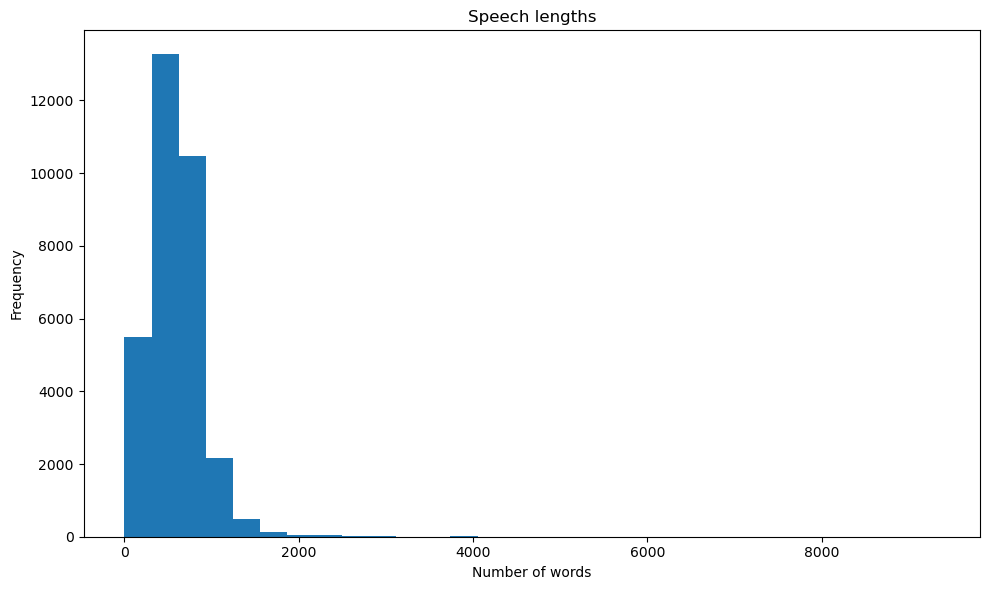

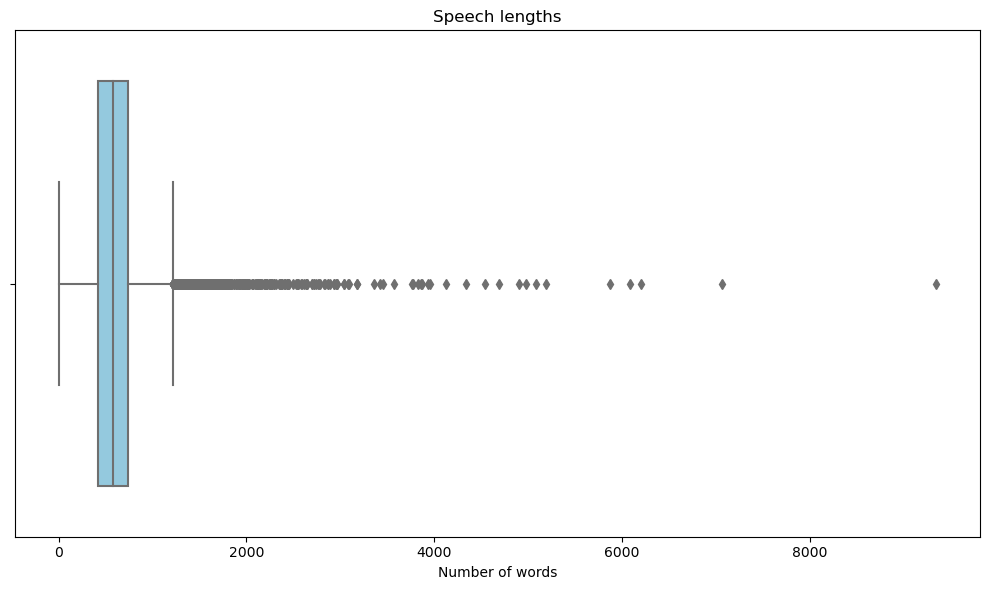

In [25]:
# analysing distribution of speech lengths

# speech length
plt.figure(figsize=(10, 6))
plt.hist(data["speech_length"], bins=30)
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.title("Speech lengths")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data["speech_length"], color="skyblue")
plt.xlabel("Number of words")
plt.title("Speech lengths")
plt.tight_layout()
plt.show() # some outliers with very long speeches!

In [34]:
data.describe(include='all')

,speech_id,speaker_id,speech_text,legislative_period,protocol_nr,agenda_item_number,speakerId,party,fraction,tokenized_text,speech_length,speakerName
count,32136,3.213600e+04,32136,32136.000000,32136.000000,32136.000000,3.213600e+04,32136,28953,32136,32136.000000,32136
unique,32136,NaN,32122,NaN,NaN,NaN,NaN,7,6,32122,NaN,1010
top,f7f58b13-85f3-424a-6864-08da102a68d8,NaN,herr präsident ich schwöre es so wahr mir gott...,NaN,NaN,NaN,NaN,SPD,CDU/CSU,"[herr, präsident, ich, schwöre, es, so, wahr, ...",NaN,Angela Merkel
freq,1,NaN,6,NaN,NaN,NaN,NaN,6968,7733,6,NaN,367
mean,NaN,1.100429e+07,NaN,19.275517,106.741100,6.307008,1.100429e+07,NaN,NaN,NaN,581.809871,NaN
std,NaN,7.304331e+02,NaN,0.446781,68.291908,5.432492,7.304331e+02,NaN,NaN,NaN,326.854976,NaN
min,NaN,1.100020e+07,NaN,19.000000,1.000000,1.000000,1.100020e+07,NaN,NaN,NaN,1.000000,NaN
25%,NaN,1.100405e+07,NaN,19.000000,50.000000,2.000000,1.100405e+07,NaN,NaN,NaN,417.000000,NaN
50%,NaN,1.100439e+07,NaN,19.000000,89.000000,4.000000,1.100439e+07,NaN,NaN,NaN,575.000000,NaN
75%,NaN,1.100480e+07,NaN,20.000000,166.000000,9.000000,1.100480e+07,NaN,NaN,NaN,737.000000,NaN


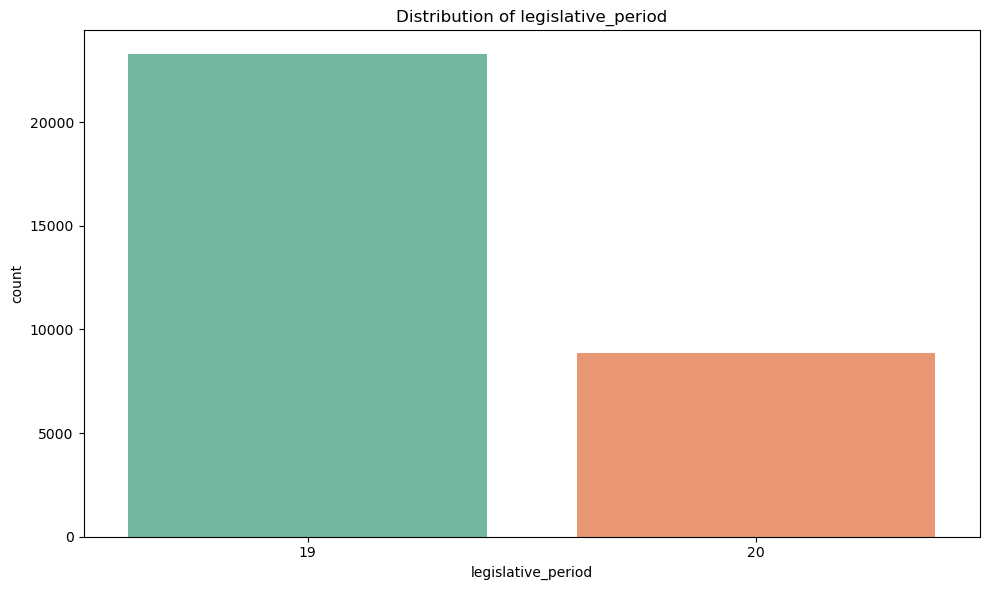

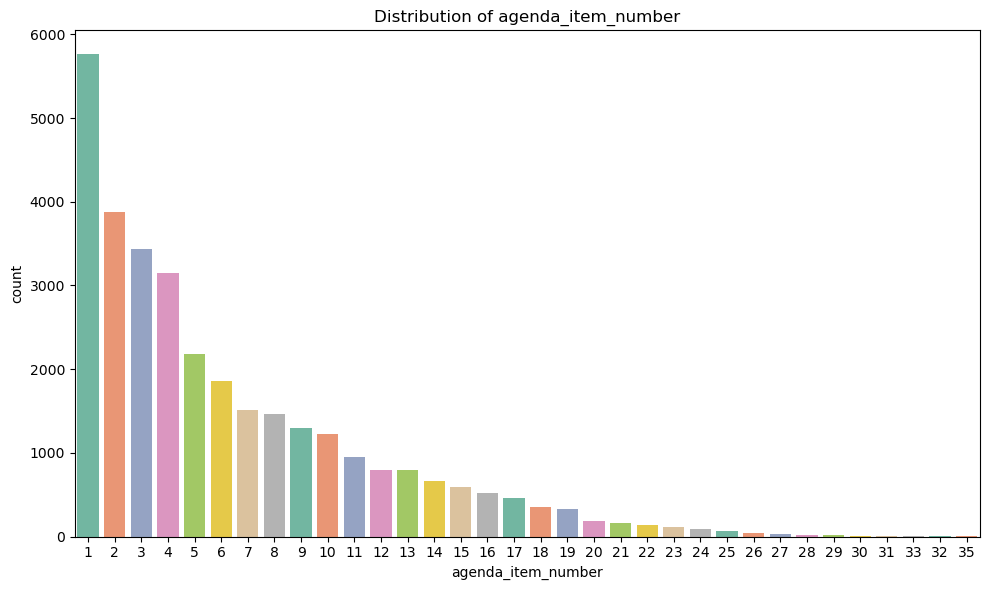

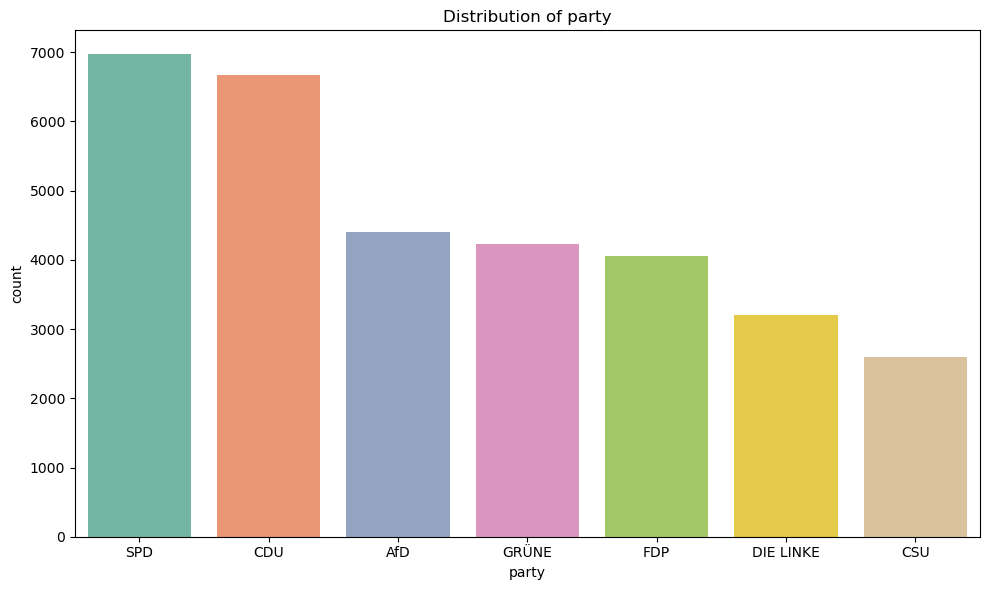

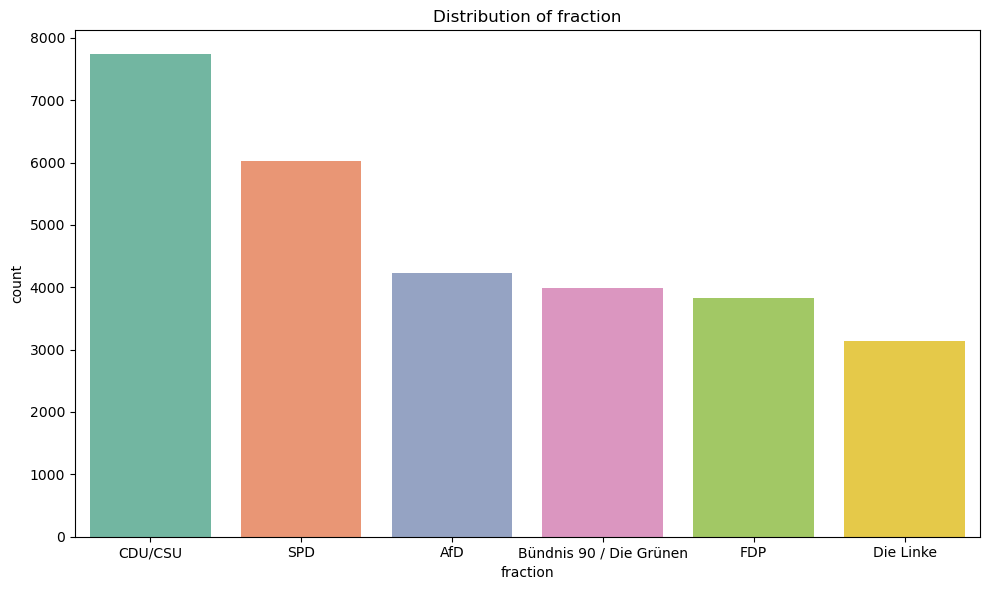

In [ ]:
# Visualising features in barplots where information is sensical

# subsetting columns that can be interesting
features_to_plot = ['legislative_period', 'party', 'fraction']

# visualising
for coloumn in features_to_plot:
    order = data[coloumn].value_counts().index
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=coloumn, order = order, palette='Set2')
    plt.title(f'Distribution of {coloumn}')
    plt.tight_layout()
    plt.show()


In [ ]:
# topic distribution? -> word clouds and word counts by party of topic column 


In [74]:
# preparing stopwords

# importing german stopword list from github
# link: https://github.com/solariz/german_stopwords
with open("german_stopwords_full.txt", "r", encoding="utf-8") as g:
    german_stopwords_full = [line.strip() for line in g if not line.lstrip().startswith(";")]

# maybe list of words to add to stopwords:
more_stopwords = ["damen", "herren", "kollegen", "kolleginnen", "menschen", "deutschland", "liebe"]

# add list of additional words
german_stopwords_full.extend(more_stopwords)

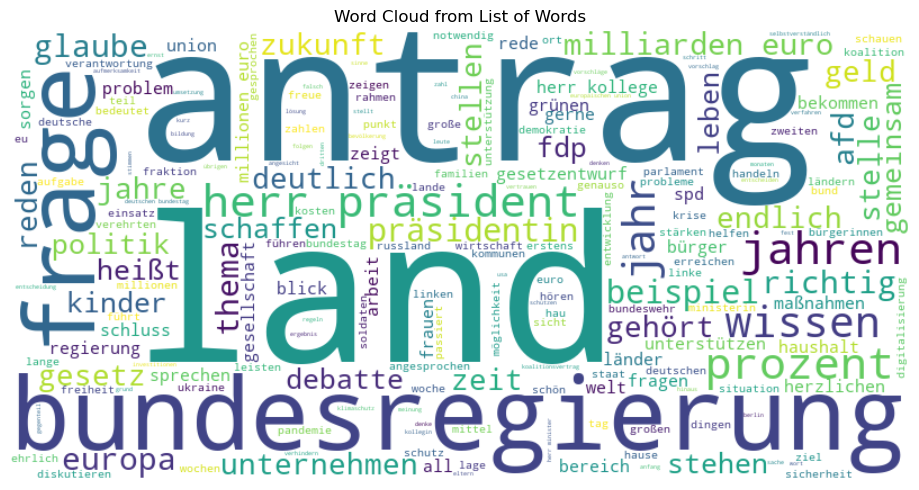

In [ ]:
# visualising shared word cloud
# Handling speech texts - speech segmentation ??

text = ' '.join(all_words)

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=german_stopwords_full).generate(text)

# Displaying it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from List of Words")
plt.tight_layout()
plt.show()

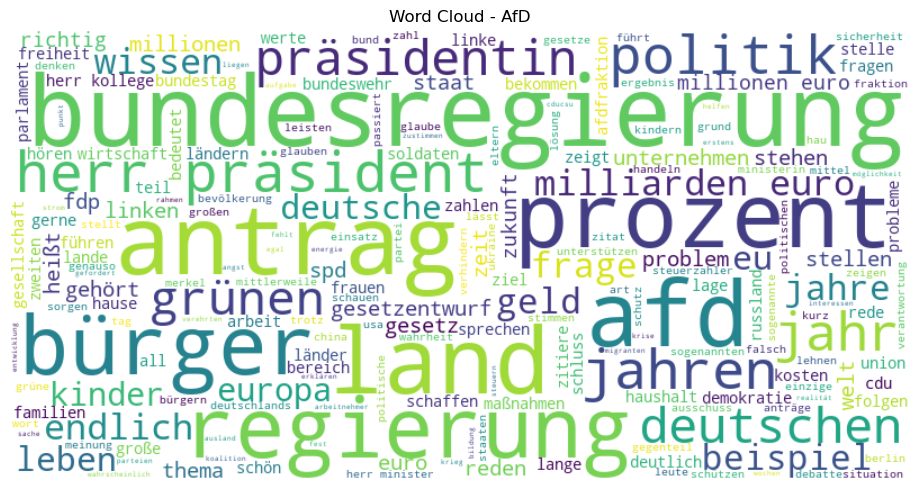

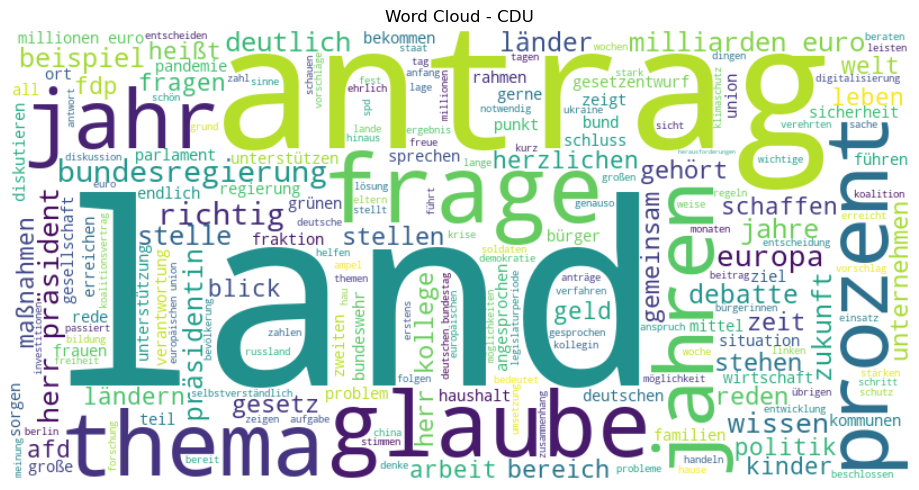

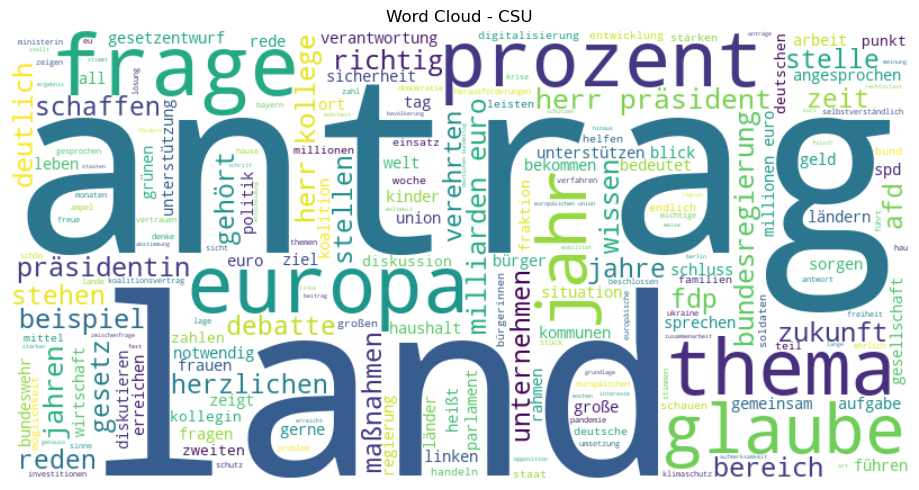

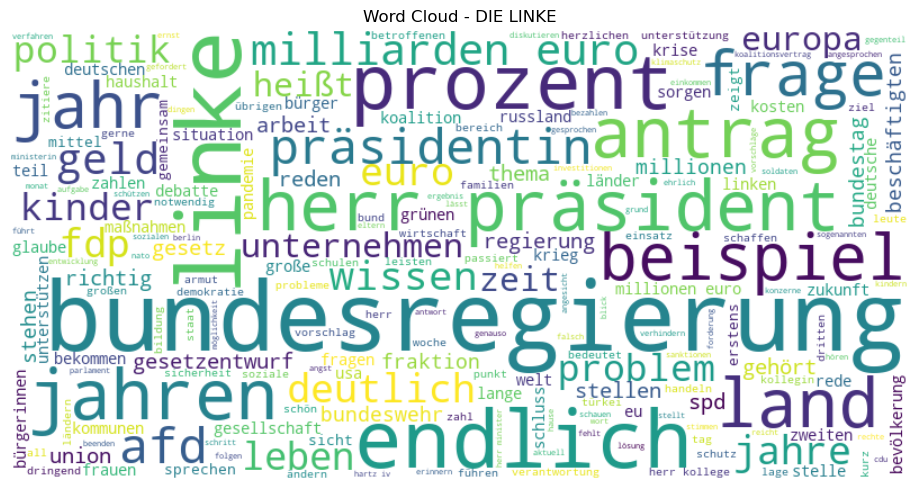

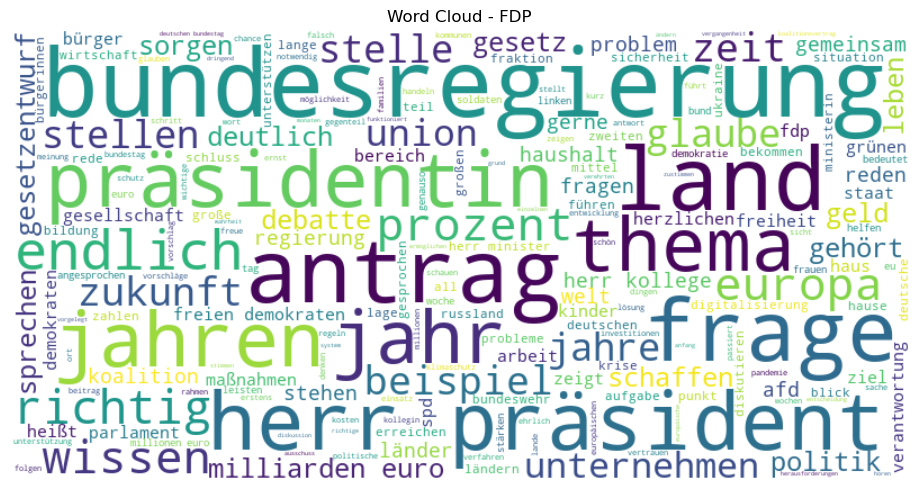

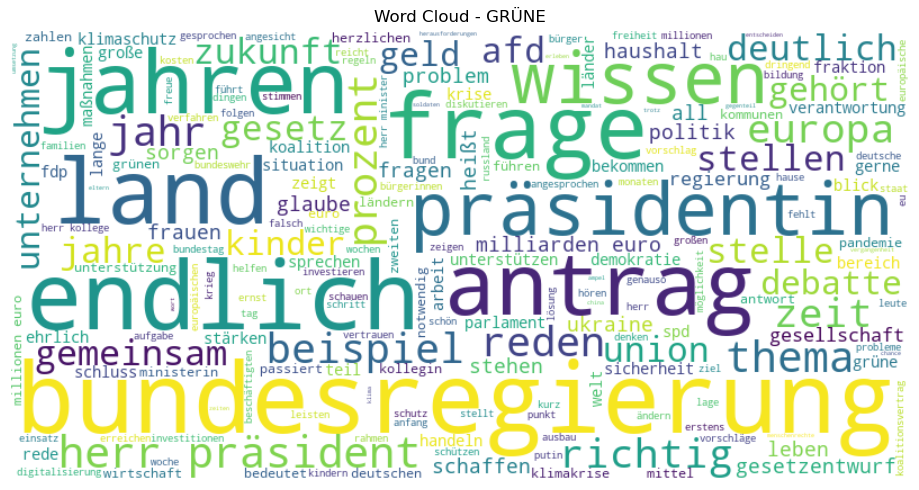

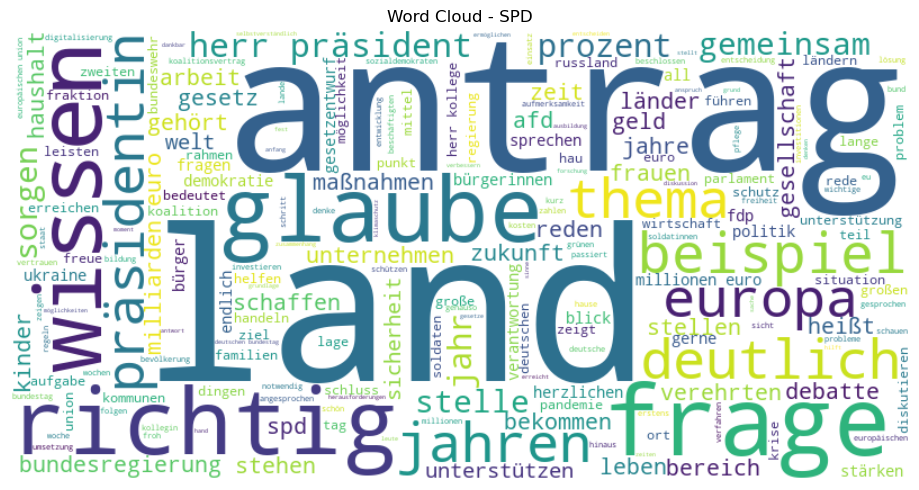

In [76]:
# word cloud per party

# grouping words by party
party_words = data.groupby('party')['tokenized_text'].sum()

# creating seperate wordclouds per party
for party, words in party_words.items():
    text = ' '.join(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=german_stopwords_full).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {party}")
    plt.tight_layout()
    plt.show()

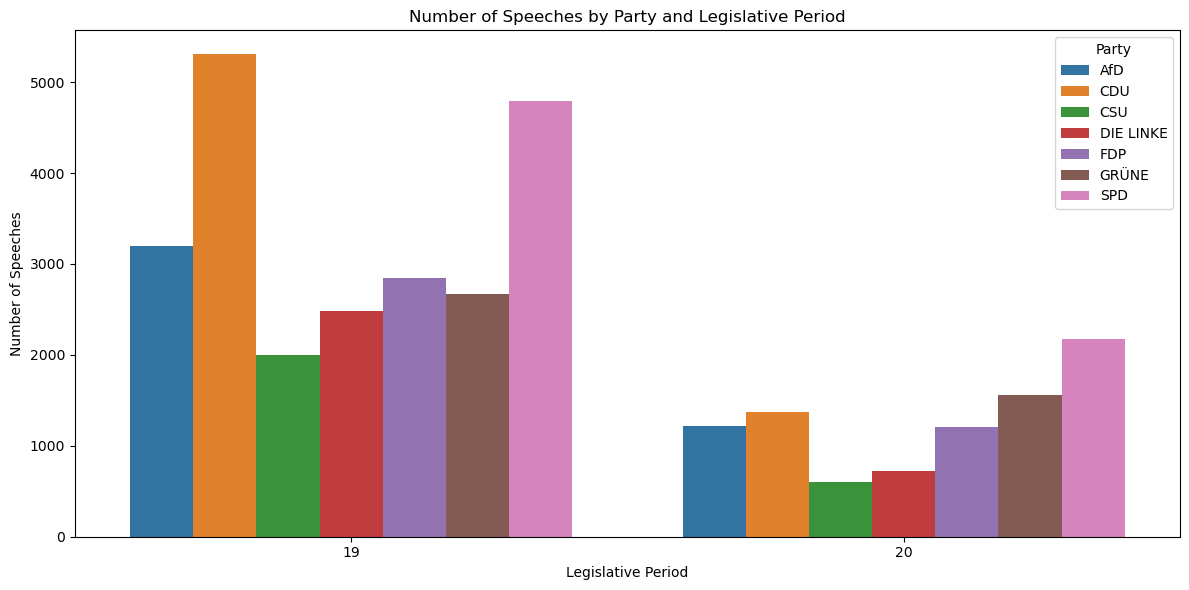

In [63]:
# temporal analysis - speech distributions grouped by legislative period

grouped = data.groupby(['legislative_period', 'party']).size().reset_index(name='speech_count')
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='legislative_period', y='speech_count', hue='party')

plt.title("Number of Speeches by Party and Legislative Period")
plt.xlabel("Legislative Period")
plt.ylabel("Number of Speeches")
plt.legend(title="Party")
plt.tight_layout()
plt.show()

In [ ]:
# more better temporal analyses, also with column that Estelle will add
# maybe get sth from Pascal